# Internship Project #2: Heart Disease Diagnostic Analysis

* Domain: Health Care

* Difficulty Level: Intermediate

* Submitted by: Saurabh Sahu

## Problem Statement:

* Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.

* Do ETL: Extract- Transform and Load data from the heart disease diagnostic database. You can perform EDA through python.
* The database extracts various information such as Heart disease rates, Heart disease by gender, by age. You can even compare attributes of the data set to extract necessary information.
* Make the necessary dashboard with the best you can extract from the data. Use various visualization and features and make the best dashboard.
* Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.

### Dataset Link:
https://drive.google.com/file/d/1U8CHK_ye5jmcuYEeIOYIYcMzK2ooqLUV/view

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Step 1: Extract - Loading the dataset

In [2]:
from google.colab import files
data = files.upload()

Saving Heart Disease data.csv to Heart Disease data.csv


In [3]:
data = pd.read_csv('Heart Disease data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Step 2: Transform - Cleaning the data.

In [4]:
# Column Names from the data set
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Overview & Description of Dataset

Basically, there are 14 columns in dataset (13 features & 1 target)

1. age: Person's age in years
2. sex: Person's sex (1 = Male, 0 = Female)
3. cp: Chest pain experienced by patients, values represents as-
  * 1 = Typical Angina
  * 2 = Atypical Angina
  * 3 = Non-Anginal pain
  * 4 = Asymptomatic

4. trestbps: Person's resting blood pressure.
5. chol: Person's cholesterol (measurement in mg/dl)
6. fbs: Person's fasting blood sugar, if greater than 120 mg/dl
  * 1 = True
  * 0 = False
7. restecg: Resting ECG measurement, values represents as-
  * 0 = Normal
  * 1 = Having ST-T wave abnormality
  * 2 = Probable or Definite left ventricular hypertrophy.
8. thalach: Person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = Yes, 0 = No)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: Slope of the peak exercise ST segment, values represents as-
  * 1: Upsloping
  * 2: Flat
  * 3: Downsloping
12. ca: Number of major vessels (0-3) colored by flouroscopy
13. thal: Thalassemia (Blood disorder), values represents as-
  * 0 = Normal
  * 1 = Fixed Defect
  * 2 = Reversable Defect
  * 3 = Others
14. target: Heart disease (0 = Negative, 1 = Positive)

* Now, let's check datatype of each column.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* All the columns have numerical values, but we noticed they contain categorical data as well.
* Let's figure out what columns can be numerical.

In [6]:
cat_value = []
num_value = []
for column in data.columns:
  # Assuming, num of unique values <= 5, it's a Categorical column
  if data[column].nunique() <= 5:
    cat_value.append(column)
  else:
    num_value.append(column)

In [7]:
print("Categorical Columns :", cat_value)
print("Numerical Columns :", num_value)

Categorical Columns : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numerical Columns : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [8]:
# Checking the Unique Values for each filtered column
for i in cat_value:
  print(i, ":", data[i].unique())

sex : [1 0]
cp : [0 1 2 3]
fbs : [0 1]
restecg : [1 0 2]
exang : [0 1]
slope : [2 0 1]
ca : [2 0 1 3 4]
thal : [3 2 1 0]
target : [0 1]


* Some of this categorical columns are neccessary to be converted from numerical.
* This conversion of columns is dealt with in a later step.

### Check for null values

In [9]:
print("Null values in each column:\n\n", data.isnull().sum())

Null values in each column:

 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


* Given dataset is clean, has no null values.
* Let's check for the duplicate entries.

In [10]:
data.duplicated().any()

True

In [11]:
data.shape

(1025, 14)

In [12]:
org_values = data.shape

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(302, 14)

In [15]:
final_values = data.shape

In [16]:
dup_values = org_values[0] - final_values[0]
print("Number of duplicate values removed:", dup_values)
print("Number of entries left in the dataset:", final_values[0])

Number of duplicate values removed: 723
Number of entries left in the dataset: 302


## Step 3: EDA - Exploratory Data Analysis

In [17]:
# count for unique values in target column
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [18]:
# percentage count for unique values in target column
(data['target'].value_counts(normalize=True) * 100).round(2)

target
1    54.3
0    45.7
Name: proportion, dtype: float64

* The ratio between the two classes is close to a 50-50 distribution.
* This indicates that the data is fairly balanced and is good for data analysis.

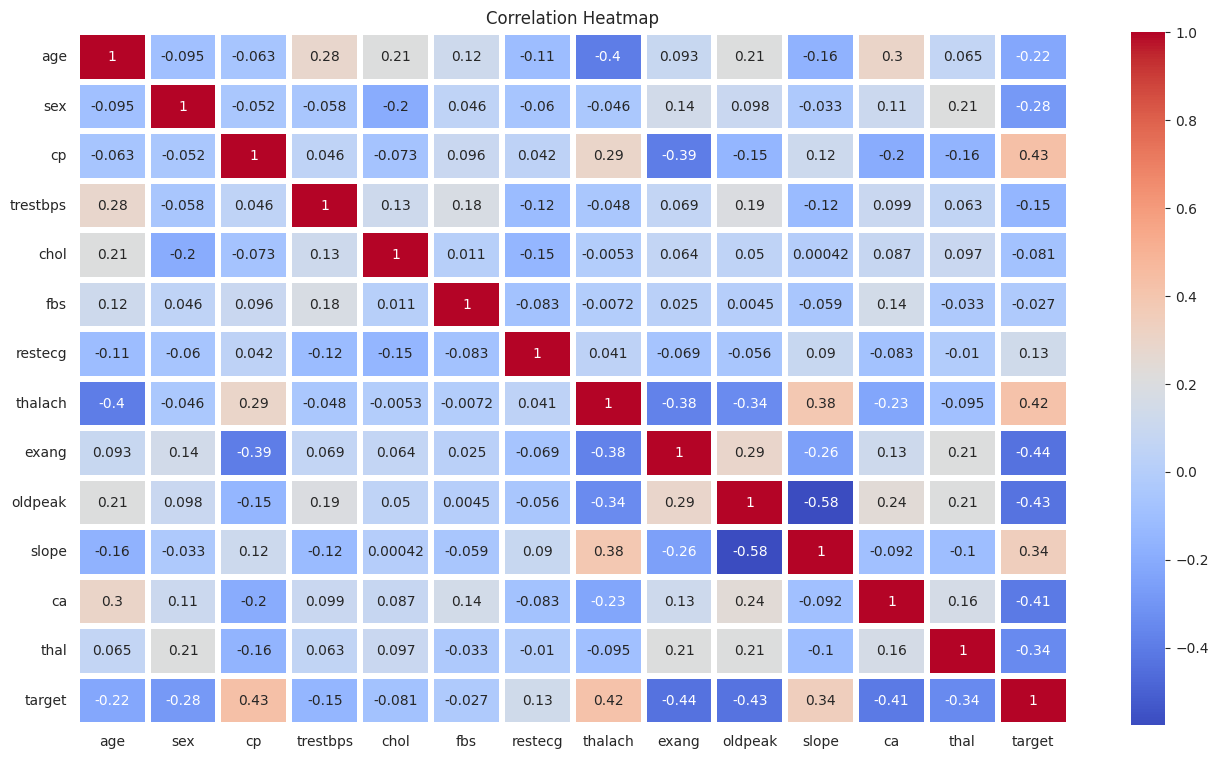

In [19]:
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(), annot= True, cmap= 'coolwarm', linewidths= 3)
plt.title('Correlation Heatmap')
plt.show()

* Heatmaps are good but takes time to see all the correlations.
* Let's flaten the correlations to bar plots to get filtered correlations.

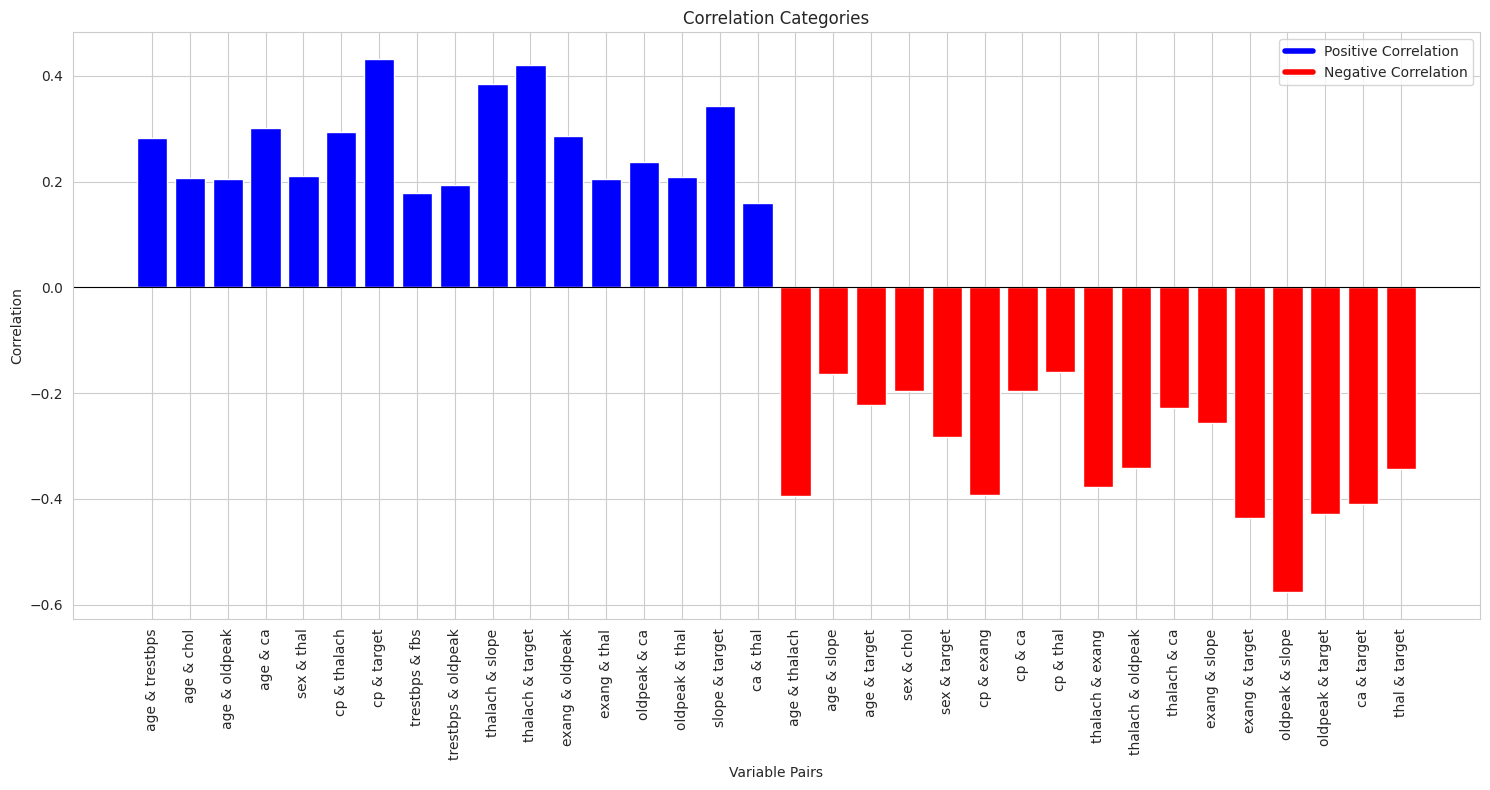

In [20]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Flatten the correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']].drop_duplicates(subset=['Correlation'])

# Define the updated categories for correlation
def categorize_correlation(corr):
    if 0.15 <= corr <= 0.20 or -0.20 <= corr < -0.15:
        return 'Slightly Correlated'
    elif 0.20 < corr <= 0.30 or -0.30 <= corr < -0.20:
        return 'Somewhat Correlated'
    elif 0.30 < corr <= 0.45 or -0.45 <= corr < -0.30:
        return 'Moderately Correlated'
    elif 0.45 < corr <= 1 or -1 <= corr < -0.45:
        return 'Highly Correlated'
    else:
        return 'Uncategorized'

# Apply the updated categorization
corr_pairs['Category'] = corr_pairs['Correlation'].apply(categorize_correlation)

# Filter out the 'Uncategorized' correlations
filtered_corr_pairs = corr_pairs[corr_pairs['Category'] != 'Uncategorized']

# Split positive and negative correlations for plotting
positive_corr = filtered_corr_pairs[filtered_corr_pairs['Correlation'] > 0]
negative_corr = filtered_corr_pairs[filtered_corr_pairs['Correlation'] < 0]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Bar plot for positive correlations
for i, row in positive_corr.iterrows():
    ax.bar(f"{row['Variable1']} & {row['Variable2']}", row['Correlation'], color='blue')

# Bar plot for negative correlations
for i, row in negative_corr.iterrows():
    ax.bar(f"{row['Variable1']} & {row['Variable2']}", row['Correlation'], color='red')

# Adding labels and title
ax.set_xlabel('Variable Pairs')
ax.set_ylabel('Correlation')
ax.set_title('Correlation Categories')
ax.axhline(0, color='black', linewidth=0.8)

# Rotating x labels for better readability
plt.xticks(rotation=90)

# Display legend
handles = [plt.Line2D([0], [0], color='blue', lw=4, label='Positive Correlation'),
           plt.Line2D([0], [0], color='red', lw=4, label='Negative Correlation')]
ax.legend(handles=handles)

# Show plot
plt.tight_layout()
plt.show()

* Note- Our Analysis focuses on Diagonistic of Heart Disease, means more focus to detection of Heart disease.

### Correlations with respect to Heart Diesease.
* Shades of Red represents Direct (+ve) correlation.
  1. Chest Pain, highly correlated.
  2. Person's max heart rate achieved, highly correlated .
  3. Slope of the peak exercise ST segment, highly correlated.
  4. Resting ECG, slightly correlated.

* Shades of Blue represents Indirect (-ve) correlation.
  1. Exercise induced angina, highly correlated.
  2. ST depression induced by exercise, highly correlated.
  3. The number of major vessels, highly correlated.
  4. Thalassemia, highly correlated.
  5. Gender, highly correlated.
  6. Age, somewhat correlated.

* Converting Numerical Columns to Categorical

In [21]:
def heart_disease(x):
  if x == 0:
    return 'Negative'
  else:
    return 'Positive'

def gender(x):
  if x == 0:
      return 'Female'
  else:
      return 'Male'

def age_range(x):
    if x<=30:
        return 'Young'
    elif x>30 and x<=45:
        return 'Mature'
    elif x>45 and x<=60:
        return 'Old'
    else:
        return 'Elders'

In [22]:
data['Heart Disease'] = data['target'].apply(heart_disease)
data['Gender'] = data['sex'].apply(gender)
data['Age Range'] = data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease,Gender,Age Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Negative,Male,Old
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Negative,Male,Old
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Negative,Male,Elders
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Negative,Male,Elders
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Negative,Female,Elders


## Step 4: Data Visualization

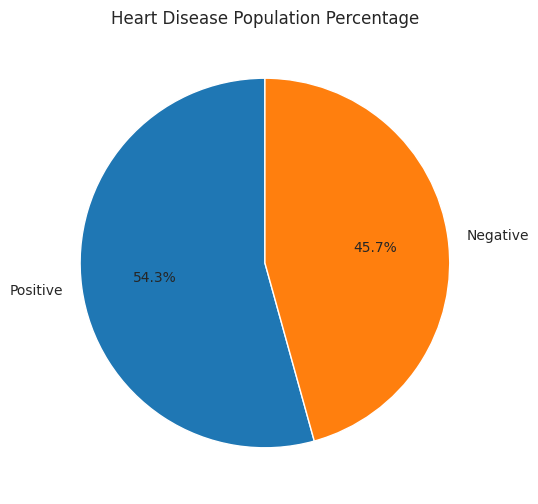

In [23]:
# Calculate the counts of each heart disease category
heart_disease_counts = data['Heart Disease'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Population Percentage')
plt.show()

* More than half of the population has been detected with heart disease.

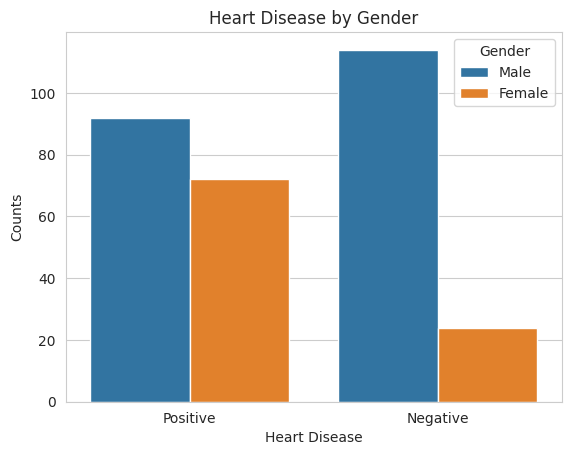

In [24]:
# Count plot of Heart Disease by Gender

sns.countplot(x='Heart Disease', hue='Gender', data=data, order=['Positive', 'Negative'])
plt.ylabel('Counts')
plt.title('Heart Disease by Gender')
plt.show()

* Males are more prone to heart disease compared to females.

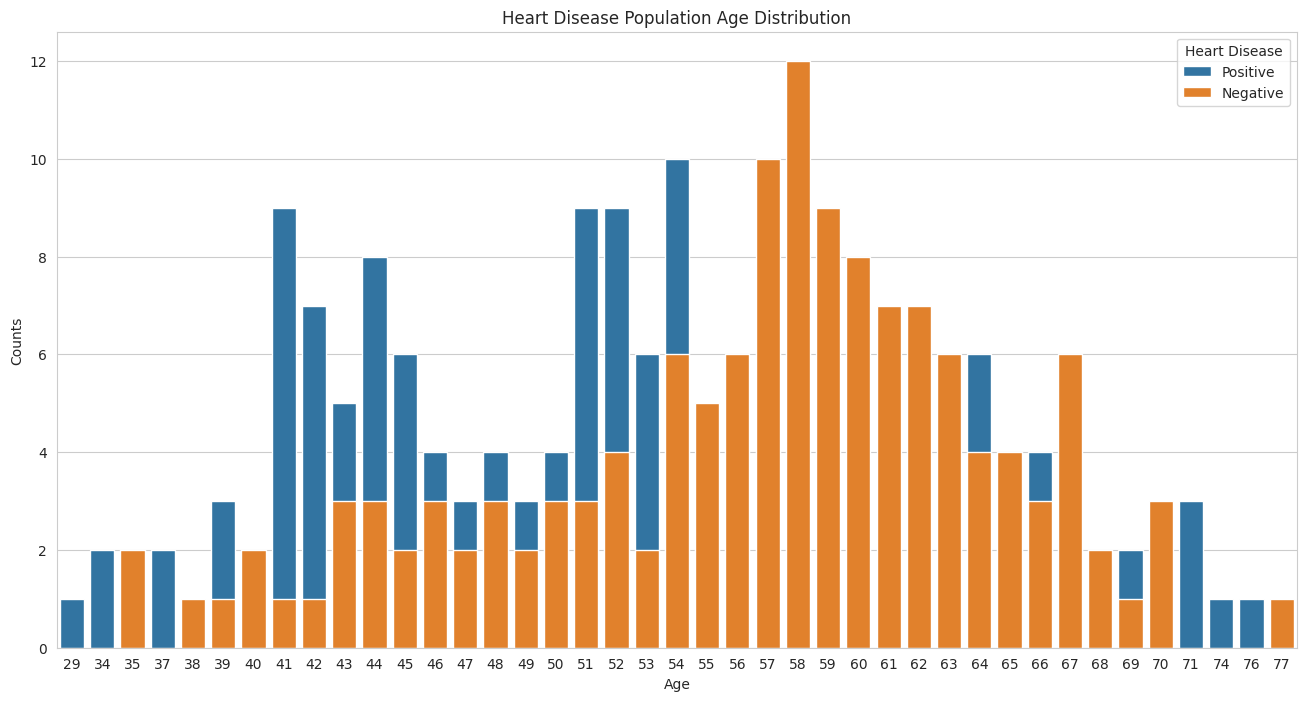

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(x='age', data=data, hue='Heart Disease', dodge= False)
plt.title('Heart Disease Population Age Distribution')
plt.xlabel("Age")
plt.ylabel("Counts")
plt.show()

* From the distribution above, there is a mix of upward and downward trends.
* For better analysis, age has been grouped into several categories (i.e., Age Ranges).

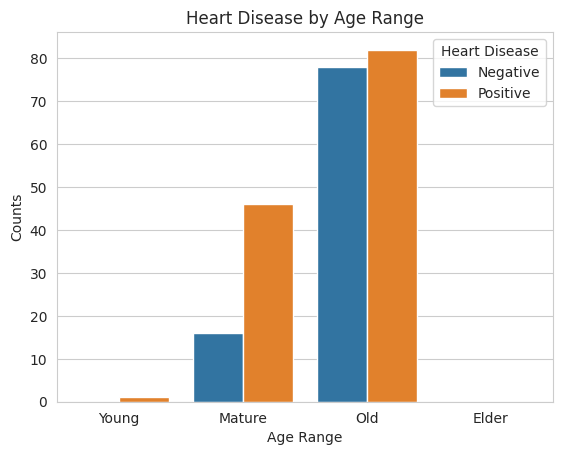

In [26]:
# Countplot of Heart Disease by Age Range

sns.countplot(data=data, x='Age Range', hue='Heart Disease', order=['Young', 'Mature', 'Old', 'Elder'])
plt.ylabel('Counts')
plt.title('Heart Disease by Age Range')
plt.show()

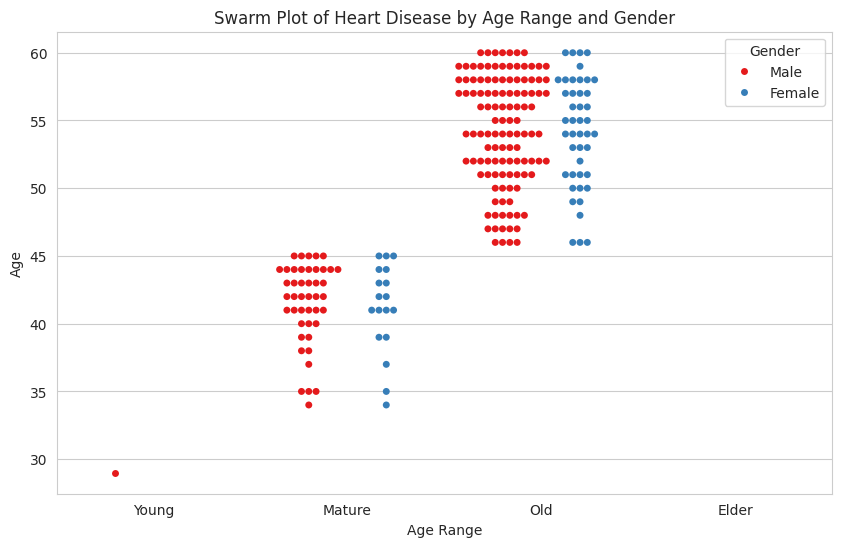

In [27]:
# Swarm Plot of Heart Disease by Age Range and Gender

plt.figure(figsize=(10,6))
sns.swarmplot(x="Age Range", y="age", hue="Gender", data=data, palette="Set1", dodge=True,
              order=['Young', 'Mature', 'Old', 'Elder'])
plt.title("Swarm Plot of Heart Disease by Age Range and Gender")
plt.ylabel("Age")
plt.show()

From both the plots,
  * Old Adults (45 to 60 years) have the highest number of heart disease cases and are more prone to it.
  * Surprisingly, Mature Adults have a higher number of heart disease cases than Elders.
  * Young adults are less prone to getting heart disease.

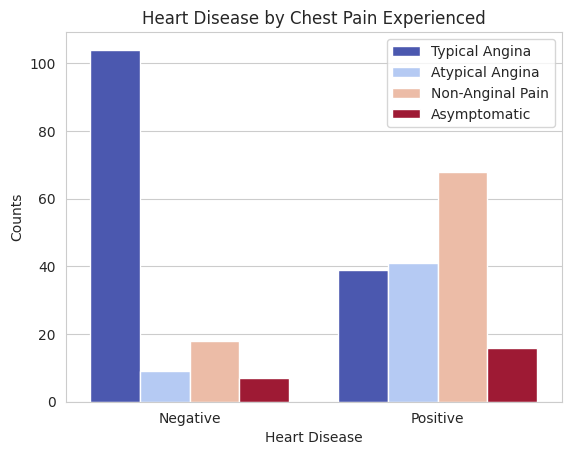

In [28]:
# Count Plot of Heart Disease by Chest Pain Experienced

sns.countplot(data=data, x='Heart Disease', hue='cp', palette= 'coolwarm')
plt.ylabel('Counts')
plt.legend(labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.title('Heart Disease by Chest Pain Experienced')
plt.show()

* Most negative heart disease cases involve chest pain experienced as typical angina.
* Non-anginal chest pain is a significant indicator for being diagnosed with heart disease.

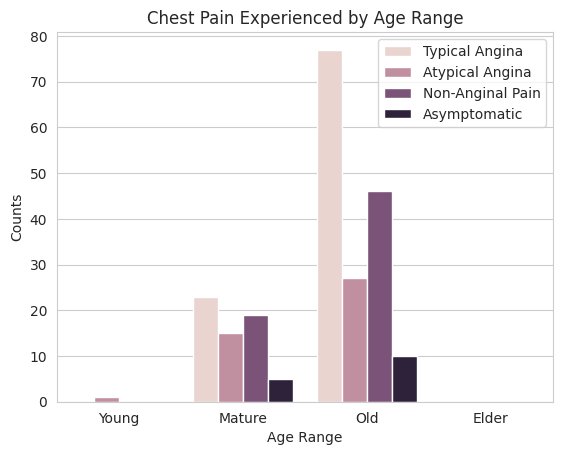

In [29]:
# Count Plot of Age Range by Chest Pain Experienced

sns.countplot(data=data, x='Age Range', hue='cp', order= ['Young', 'Mature', 'Old', 'Elder'])
plt.title('Chest Pain Experienced by Age Range')
plt.legend(labels = ['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.ylabel('Counts')
plt.show()

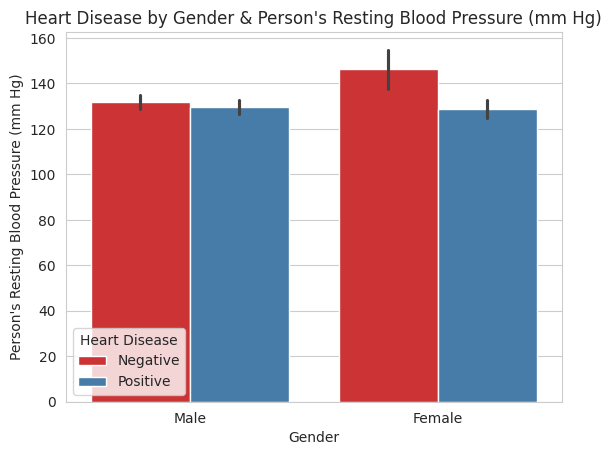

In [30]:
# Bar plot of Heart Disease by Gender & Person's Resting Blood Pressure (mm Hg)

sns.barplot(x = 'Gender', y = 'trestbps', data = data, hue='Heart Disease', palette= 'Set1')
plt.ylabel('Person\'s Resting Blood Pressure (mm Hg)')
plt.title("Heart Disease by Gender & Person's Resting Blood Pressure (mm Hg)")
plt.show()

* Individuals with heart disease tend to have slightly lower resting blood pressure.
* The resting blood pressure for both genders is similar.

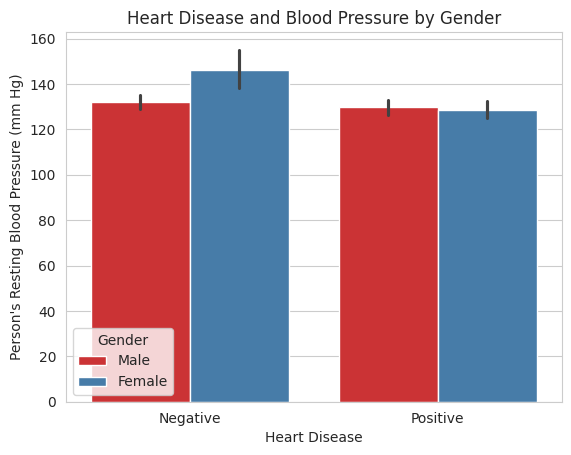

In [31]:
# Bar Plot of Heart Disease and Blood Pressure by Gender

sns.barplot(x = 'Heart Disease', y = 'trestbps', data = data, hue= 'Gender', palette= 'Set1')
plt.ylabel("Person's Resting Blood Pressure (mm Hg)")
plt.title("Heart Disease and Blood Pressure by Gender")
plt.show()

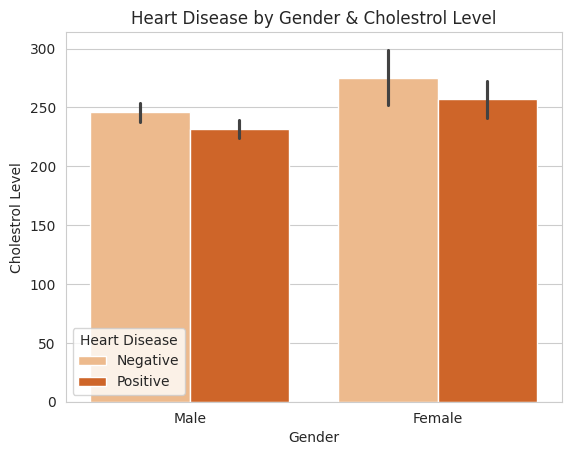

In [32]:
# Bar plot of Heart Disease by Gender & Cholestrol Level

sns.barplot(x = 'Gender', y = 'chol', data = data, hue='Heart Disease', palette= 'Oranges')
plt.ylabel('Cholestrol Level')
plt.title("Heart Disease by Gender & Cholestrol Level")
plt.show()


* Females have higher cholesterol levels, specifically greater than 250 mg/dl, compared to males.

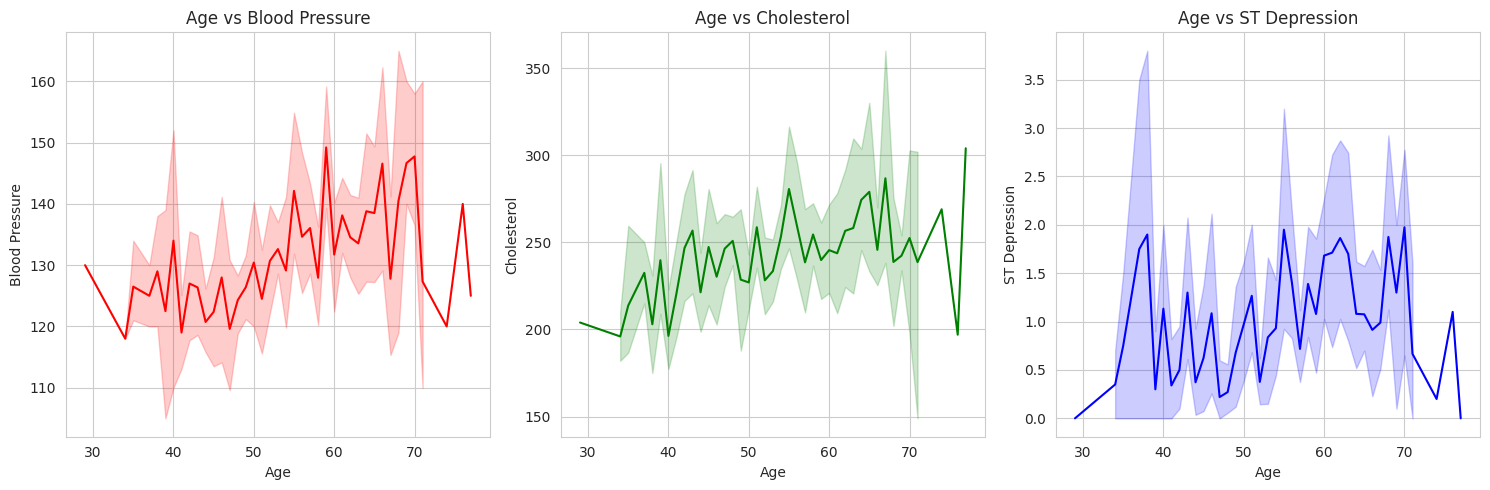

In [33]:
# Subplots for Age vs Blood Pressure, Age vs Cholesterol & Age vs ST Depression
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Age vs Blood Pressure
sns.lineplot(x='age', y='trestbps', data=data, ax=axes[0], color = 'Red')
axes[0].set_title('Age vs Blood Pressure')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Blood Pressure')

# Plot Age vs Cholesterol
sns.lineplot(x='age', y='chol', data=data, ax=axes[1], color = 'Green')
axes[1].set_title('Age vs Cholesterol')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Cholesterol')

# Plot Age vs ST Depression
sns.lineplot(x='age', y='oldpeak', data=data, ax=axes[2], color = 'Blue')
axes[2].set_title('Age vs ST Depression')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('ST Depression')

# Adjust layout
plt.tight_layout()
plt.show()


From the subplots,
  * Blood pressure increases from ages 40 to 70, then shows a decline.
  * Similarly, cholesterol levels rise from ages 40 to 65 and then decline.
  * ST depression also shows a gradual increase from ages 40 to 65, followed by a decline.

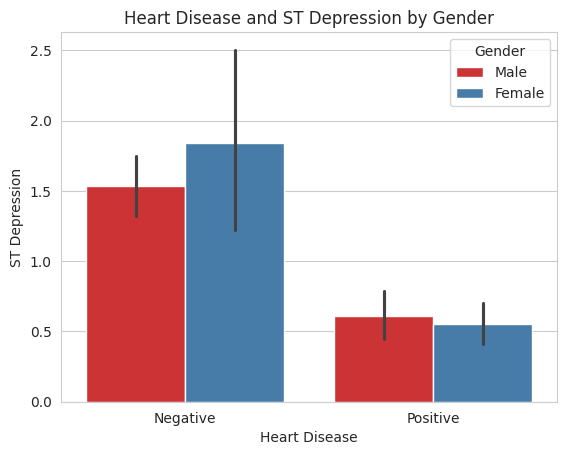

In [34]:
# Bar plot of Heart Disease and ST Depression

sns.barplot(x = 'Heart Disease', y = 'oldpeak', data = data, hue= 'Gender', palette= 'Set1')
plt.ylabel("ST Depression")
plt.title("Heart Disease and ST Depression by Gender")
plt.show()

* ST depression refers to a downward displacement of the ST segment on an electrocardiogram (ECG), which can indicate ischemia or inadequate blood flow to the heart.
* It is often used as a diagnostic marker in evaluating heart conditions.
* Males are more prone to experiencing ST depression compared to females.

### Some extra Visualization

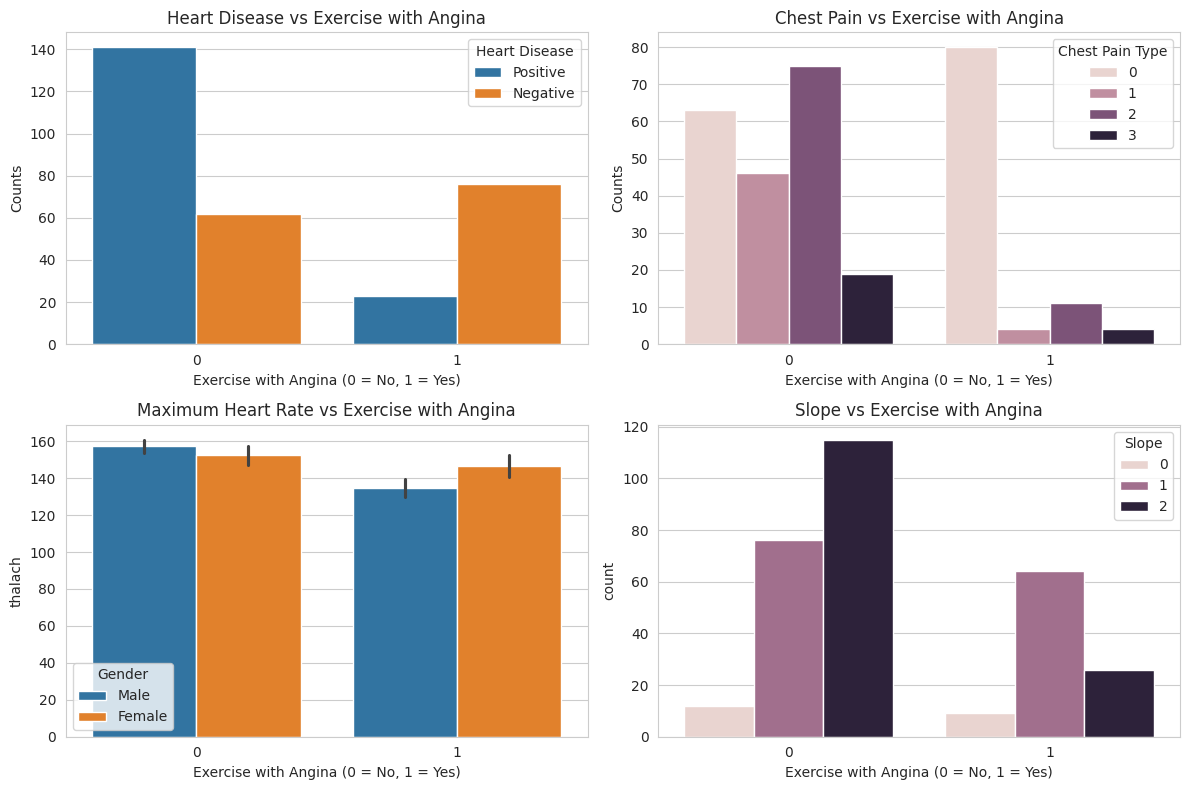

In [35]:
# Create subplots of Exercise with Angina
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Heart Disease vs Exercise with Angina
sns.countplot(x='exang', hue= 'Heart Disease', data=data, ax=axes[0, 0], hue_order=['Positive', 'Negative'])
axes[0, 0].set_title('Heart Disease vs Exercise with Angina')
axes[0, 0].set_xlabel('Exercise with Angina (0 = No, 1 = Yes)')
axes[0, 0].set_ylabel('Counts')
axes[0, 0].legend(title='Heart Disease')

# Plot Chest Pain vs Exercise with Angina
sns.countplot(x='exang', hue='cp', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Chest Pain vs Exercise with Angina')
axes[0, 1].legend(labels = ['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
axes[0, 1].set_xlabel('Exercise with Angina (0 = No, 1 = Yes)')
axes[0, 1].set_ylabel('Counts')
axes[0, 1].legend(title='Chest Pain Type')

# Plot Maximum Heart Rate vs Exercise with Angina
sns.barplot(x='exang', y='thalach', hue='Gender', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Maximum Heart Rate vs Exercise with Angina')
axes[1, 0].set_xlabel('Exercise with Angina (0 = No, 1 = Yes)')
axes[1, 0].legend(title='Gender')

# Plot Slope of the peak exercise ST segment vs Exercise with Angina
sns.countplot(x='exang', hue='slope', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Slope vs Exercise with Angina')
axes[1, 1].set_xlabel('Exercise with Angina (0 = No, 1 = Yes)')
axes[1, 1].legend(title='Slope')

# Adjust layout
plt.tight_layout()
plt.show()

* Exercise angina refers to chest pain or discomfort that occurs during physical activity due to insufficient blood flow to the heart.
* It is often a sign of coronary artery disease and typically resolves with rest.
* Exercising can help protect against heart disease, as long as it does not cause severe chest pain.
* If you have angina, you might be concerned that exercising will worsen your symptoms.
* Males experience exercise angina more frequently than females.